## Helium


In [2]:
#first import our packages
from numpy import *
%matplotlib inline
from matplotlib.pyplot import *
from astropy.io import ascii
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


In [3]:
import pandas as pd 
gd = pd.read_csv('GD.csv')
rb = pd.read_csv('RB.csv')

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[]

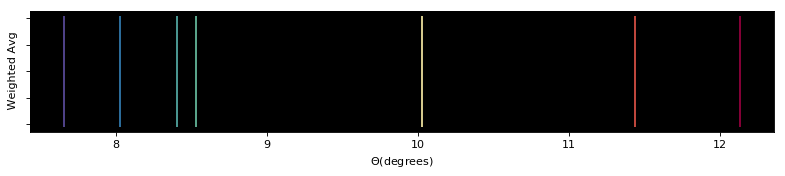

In [4]:
cmap_r = matplotlib.cm.get_cmap('Spectral_r')
x = (gd.G1 + gd.G2)/2
y = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

f=plt.figure(figsize=(12, 2), dpi=80)
fig = plt.figure(1)
ax = fig.add_subplot(111, axisbg='black')
ax.scatter(x,y,c = gd.LAMR, cmap = cmap_r,marker='|',s=10000)
fig.canvas.draw()
plt.xlabel('$\Theta$(degrees)')
plt.ylabel(' Weighted Avg')
ax.set_yticklabels([])

# Propagating Error of D

In [5]:

for i in range(7):

    th1 = (-1) * gd.LAMR[i] * (math.cos(math.pi*gd.G1[i]/180)) / math.sin(math.pi*gd.G1[i]/180)**(2)
    th2 = (-1) * gd.LAMR[i] * (math.cos(math.pi*gd.G2[i]/180)) / math.sin(math.pi*gd.G2[i]/180)**(2)
    the1 = (th1**(2)) * (math.pi*gd.E1[i]/180)**2 
    the2 = (th2**(2)) * (math.pi*gd.E2[i]/180)**2 
    
    la1 = 1/math.sin(math.pi*gd.G1[i]/180)
    la2 = 1/math.sin(math.pi*gd.G2[i]/180)
    lae1 = (la1**(2)) * 1
    lae2 = (la2**(2)) * 1
    
    
    sumy1 = (sum(the1) + sum(lae1)) ** (1/2)
    sumy2 = (sum(the2) + sum(lae2)) ** (1/2)

    z = (sumy1+sumy2)/2


print('the error of D is',z)

the error of D is 12.269791177842706


In [6]:
error_d = z

# Graphing Zone

In [7]:
xsin = (gd.SING1 + gd.SING2)/2
ylam = gd.LAMR
yerr = (gd.E1 + gd.E2)/2

def linfit(xdata, ydata, yerror):
    def U(n):
        U_n = sum((xdata**n)/(yerror**2), 0)
        return U_n
    def W(n): 
        W_n = sum(ydata * (xdata**n) / (yerror**2)) 
        return W_n
    D = U(0) * U(2) - (U(1)**2)
    slope = (U(0)*W(1) - U(1)*W(0)) / D
    intercept = (U(2)*W(0) - U(1)*W(1)) / D
    sigma_slope = U(0)/D
    sigma_intercept = U(2)/D
    print("results")
    print("slope = %.3f +/- %.3f"%(slope, sigma_slope))
    print("intercept = %.3f +/- %.3f"%(intercept, sigma_intercept))


linfit(xsin, ylam, yerr)

results
slope = 3364.099 +/- 0.293
intercept = 0.764 +/- 0.009


[]

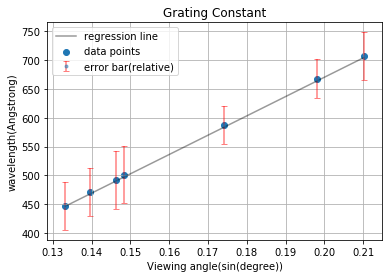

In [8]:
f = plt.figure()

j = np.linspace(min(xsin),max(xsin))
k = 3346.099 * j + 0.764
plot(j,k,c='k',alpha=0.4)

scatter(xsin,ylam)
plt.errorbar(xsin, ylam, yerr=yerr*1000,fmt='.',ecolor = 'r',alpha = 0.5,capsize=3)

plt.title('Grating Constant')
plt.xlabel('Viewing angle(sin(degree))')
plt.ylabel('wavelength(Angstrong)')
grid()
legend(['regression line','data points','error bar(relative)'])


plot()

# Propagating error of Wavelength

In [75]:
L1 = []
L2 = []

for i in range(4):

    tha1 = gd.D[0] * (math.cos(math.pi*rb.G1[i]/180))
    tha2 = gd.D[0] * (math.cos(math.pi*rb.G2[i]/180))
    thae1 = (tha1**(2)) * (math.pi*rb.E1[i]/180)**2 
    thae2 = (tha2**(2)) * (math.pi*rb.E2[i]/180)**2 
    
    d1 = math.cos(math.pi*rb.G1[i]/180)
    d2 = math.cos(math.pi*rb.G2[i]/180)
    de1 = (d1**(2)) * (error_d**2)
    de2 = (d2**(2)) * (error_d**2)
    
    sumy1 = (the1 + lae1) ** (1/2)
    sumy2 = (the2 + lae2) ** (1/2)
    
    L1.append(sumy1)
    L2.append(sumy2)
    L = L1 + L2


print(L)

[10.388207202533845, 10.388207202533845, 10.388207202533845, 10.388207202533845, 14.151375153151564, 14.151375153151564, 14.151375153151564, 14.151375153151564]


# Propagating error of Rydberg

In [84]:
lam = [rb.m_L1[i] for i in range(4)] + [rb.m_L2[i] for i in range(4)]
para = [rb.para[i] for i in range(4)] + [rb.para[i] for i in range(4)]
L = [L[i]*(1e-9) for i in range(8)]


print(lam)
print(para)
print(L)

[4.1085900000000004e-07, 4.35184e-07, 4.8568e-07, 6.53843e-07, 4.1085900000000004e-07, 4.33218e-07, 4.866700000000001e-07, 6.56556e-07]
[0.222222222, 0.21, 0.1875, 0.13888888900000002, 0.222222222, 0.21, 0.1875, 0.13888888900000002]
[1.0388207202533846e-08, 1.0388207202533846e-08, 1.0388207202533846e-08, 1.0388207202533846e-08, 1.4151375153151565e-08, 1.4151375153151565e-08, 1.4151375153151565e-08, 1.4151375153151565e-08]


In [89]:
LE = []
for i in range(8):
    dlam = (-1) * 1/(lam[i]**2 * para[i])
    dlame = (dlam**2) * (L[i])**2 
    LE.append(dlame)
    sumy = sum(LE)**(1/2)

print('the error of RH is',sumy)
sumy/rb.RHR[0]

the error of RH is 812000.2538068052


0.07399490742117341

In [120]:
rb

,G1,E1,G2,E2,SING1,SING1E,SING2,SING2E,LAM1,LAME1,...,m_L2,m_L2e,para,RH1,RHe1,RH2,RHe2,RH_w,RHR,RHE
0,7.0000,0.300,7.000,0.300,0.121869,0.005236,0.121869,0.005236,410.859336,17.652057,...,4.108590e-07,1.765210e-08,0.222222,10952653.64,2.549278e+08,10952653.64,2.549278e+08,10976876.63,10973731.6,0.02866
1,7.4167,0.033,7.383,0.083,0.129085,0.000576,0.128501,0.001449,435.184316,1.941735,...,4.332180e-07,4.883760e-09,0.210000,10942271.10,2.452397e+09,10991938.89,9.750496e+08,NaN,NaN,NaN
2,8.2830,0.033,8.300,0.083,0.144063,0.000576,0.144356,0.001449,485.679672,1.941735,...,4.866700e-07,4.883760e-09,0.187500,10981174.71,2.746684e+09,10958840.22,1.092056e+09,NaN,NaN,NaN
3,11.1830,0.033,11.230,0.033,0.193943,0.000576,0.194748,0.000576,653.842944,1.941735,...,6.565560e-07,1.941740e-09,0.138889,11011818.75,3.708024e+09,10966319.86,3.708024e+09,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10952653.64,2.549278e+08,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10991938.89,9.750496e+08,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10958840.22,1.092056e+09,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10966319.86,3.708024e+09,NaN,NaN,NaN,NaN,NaN


/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


[]

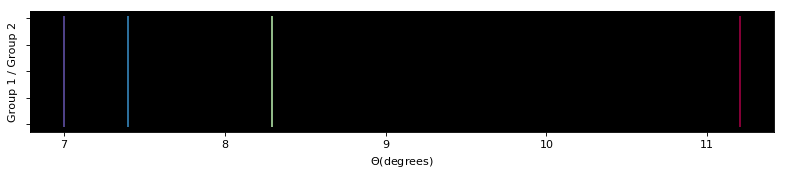

In [17]:
cmap_r = matplotlib.cm.get_cmap('Spectral_r')
x = (rb.G1+rb.G2)/2
y = [0,0,0,0,0,0,0,0]
cl=(rb.LAM1+rb.LAM2)/2
f=plt.figure(figsize=(12, 2), dpi=80)
fig = plt.figure(1)
ax = fig.add_subplot(111, axisbg='black')
ax.scatter(x,y,c = cl, cmap = cmap_r,marker='|',s=10000)
fig.canvas.draw()
plt.xlabel('$\Theta$(degrees)')
plt.ylabel('Group 1 / Group 2')
ax.set_yticklabels([])